# Chapter 1 

## Exercise 1

This simple data analysis pipeline uses a [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) model to classify flowers from the famous [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

Questions:

1. Look through the example pipeline. Mark which cells belong to which categories in this categorization:
    - Data perparation and loading
    - Modeling
    - Evaluation
    - Presentation
2. Try to determine the pieces of the code that are **unique** to this specific dataset. Discuss how you would generalize this pipeline to other datasets.

In [1]:
# Cell 1
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Cell 2
iris = pd.read_csv('../data/iris.data', names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'])
iris['Species'] = iris['Species'].map(lambda x: x.replace('Iris-','')).astype('category')
iris['id'] = iris.index
print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  id
0           5.1          3.5           1.4          0.2  setosa   0
1           4.9          3.0           1.4          0.2  setosa   1
2           4.7          3.2           1.3          0.2  setosa   2
3           4.6          3.1           1.5          0.2  setosa   3
4           5.0          3.6           1.4          0.2  setosa   4


In [3]:
# Cell 3
random_state = RandomState(seed=42)
iris = iris.sample(frac=1, random_state=random_state).reset_index(drop=True)
print(iris.head())
iris = iris.drop('id', axis=1)
print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species   id
0           6.1          2.8           4.7          1.2  versicolor   73
1           5.7          3.8           1.7          0.3      setosa   18
2           7.7          2.6           6.9          2.3   virginica  118
3           6.0          2.9           4.5          1.5  versicolor   78
4           6.8          2.8           4.8          1.4  versicolor   76
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0           6.1          2.8           4.7          1.2  versicolor
1           5.7          3.8           1.7          0.3      setosa
2           7.7          2.6           6.9          2.3   virginica
3           6.0          2.9           4.5          1.5  versicolor
4           6.8          2.8           4.8          1.4  versicolor


In [4]:
# Cell 4
train_split, test_split = train_test_split(iris, train_size=0.8, random_state=random_state)
print(train_split.groupby('Species').size())
print(test_split.groupby('Species').size())

Species
setosa        40
versicolor    39
virginica     41
dtype: int64
Species
setosa        10
versicolor    11
virginica      9
dtype: int64


In [5]:
# Cell 
tree = DecisionTreeClassifier(random_state=183)
train_data = train_split.drop('Species', axis=1)
train_target = train_split['Species']
fitted_tree = tree.fit(train_data, train_target)
print(export_text(fitted_tree, feature_names=list(train_data.columns)))

|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- Petal.Length <= 4.95
|   |   |--- Petal.Width <= 1.70
|   |   |   |--- class: versicolor
|   |   |--- Petal.Width >  1.70
|   |   |   |--- Sepal.Width <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- Sepal.Width >  3.10
|   |   |   |   |--- class: versicolor
|   |--- Petal.Length >  4.95
|   |   |--- Petal.Width <= 1.70
|   |   |   |--- Petal.Length <= 5.35
|   |   |   |   |--- Petal.Length <= 5.05
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- Petal.Length >  5.05
|   |   |   |   |   |--- class: versicolor
|   |   |   |--- Petal.Length >  5.35
|   |   |   |   |--- class: virginica
|   |   |--- Petal.Width >  1.70
|   |   |   |--- class: virginica



In [6]:
# Cell 6
test_data = test_split.drop('Species', axis=1)
test_target = test_split['Species']
predicted = fitted_tree.predict(test_data)
success = test_target == predicted

In [7]:
confusion_matrix(test_target, predicted)
accuracy_score(test_target, predicted)

0.9333333333333333

<AxesSubplot:xlabel='Sepal.Width', ylabel='Sepal.Length'>

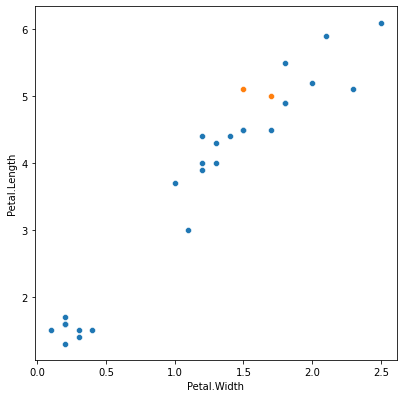

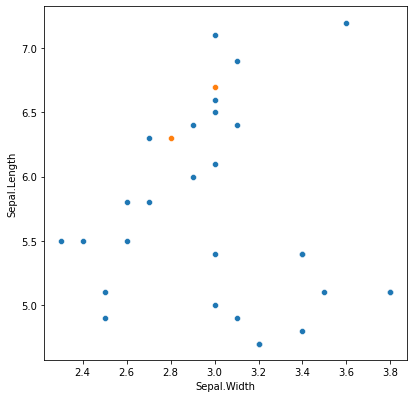

In [8]:
# Cell 6
petal_plot, petal_plot_ax = mpl.subplots(figsize=(6.5, 6.5))
sb.scatterplot(x='Petal.Width', y='Petal.Length', data=test_data[success])
sb.scatterplot(x='Petal.Width', y='Petal.Length', data=test_data[-success])
petal_plot, petal_plot_ax = mpl.subplots(figsize=(6.5, 6.5))
sb.scatterplot(x='Sepal.Width', y='Sepal.Length', data=test_data[success])
sb.scatterplot(x='Sepal.Width', y='Sepal.Length', data=test_data[-success])